## K means clustering

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data.txt")
points = df.to_numpy()
df

,x,y
0,3,5
1,10,8
2,12,14
3,7,3
4,9,15
5,25,28
6,19,21
7,3,4
8,27,21
9,19,16


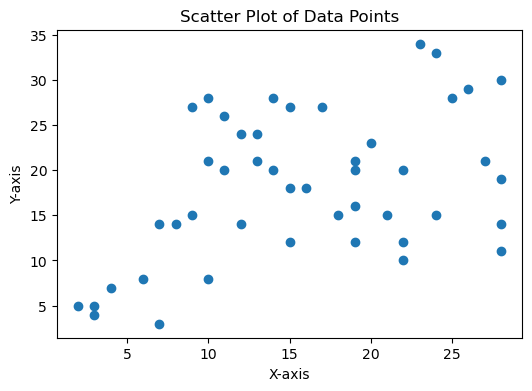

In [3]:
plt.figure(figsize=(6, 4))  
plt.scatter(df['x'], df['y'])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Data Points')
plt.show()

In [4]:
def calculateDistance(point1, point2):
    dist = ((point2[0] - point1[0]) ** 2) + ((point2[1] - point1[1]) ** 2)
    return dist

In [5]:
def mean(cluster):
    sum_x = 0
    sum_y = 0
    
    for i in cluster:
        point = points[i]
        sum_x += point[0]
        sum_y += point[1]
        
    mean_x = float(sum_x) / len(cluster)
    mean_y = float(sum_y) / len(cluster)
    
    return [mean_x, mean_y]

In [6]:
k = int(input("No of clusters: "))

No of clusters: 3


In [7]:
# Initialize k random centroids
np.random.seed(0)  
centroids = points[np.random.choice(points.shape[0], k, replace=False)]

clusters = [[] for _ in range(k)]

for _ in range(100):
    clusters = [[] for _ in range(k)]

    # Assign each point to the nearest centroid
    for i in range(points.shape[0]):
        point = points[i]
        distances = [calculateDistance(point, centroid) for centroid in centroids]
        cluster_number = np.argmin(distances)
        clusters[cluster_number].append(i)

    # Update centroids
    for i in range(k):
        centroids[i] = mean(clusters[i])

for i in range(k):
    print(f"Cluster {i + 1}:", clusters[i])

Cluster 1: [0, 1, 2, 3, 4, 7, 11, 15, 16, 19, 26]
Cluster 2: [5, 6, 10, 13, 17, 18, 22, 23, 25, 29, 32, 34, 36, 37, 38, 39, 41, 43, 45]
Cluster 3: [8, 9, 12, 14, 20, 21, 24, 27, 28, 30, 31, 33, 35, 40, 42, 44]


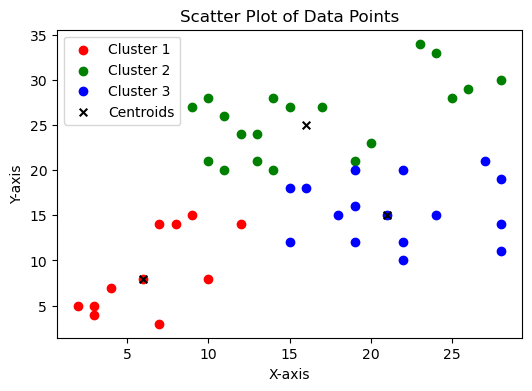

In [8]:
plt.figure(figsize=(6, 4))
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Data Points')

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i in range(k):
    cluster_points = points[clusters[i]]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i + 1}')

centroid_points = np.array(centroids)
plt.scatter(centroid_points[:, 0], centroid_points[:, 1], marker='x', s=30, c='black', label='Centroids')
plt.legend()
plt.show()